In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from openai import OpenAI
import speech_recognition as sr
from datetime import datetime
from os import path, listdir, getcwd

In [2]:
r = sr.Recognizer()
times_by_ggl = {}
times_by_whisper = {}
transcription_by_ggl = {}
transcription_by_whisper = {}

# Get all audio files
folder_path = "/audio_files/audio-stimuli/5/"
audio_files = listdir(getcwd() + folder_path)

In [3]:
def time_taken_google_speech(audio):
    start = datetime.now()
    # recognize speech using Google Speech Recognition
    try:
        text = r.recognize_google(audio)
        # print("Google Speech Recognition thinks you said " + r.recognize_google(audio))
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))

    end = datetime.now()
    total_time = end - start
    return (total_time, text)

In [4]:
def time_taken_openAI_whisper(audio):
    start = datetime.now()
    try:
        text = r.recognize_whisper(audio)
        # print(r.recognize_whisper(audio))
    except sr.UnknownValueError:
        print("Did not understand")
    except sr.RequestError as e:
        print(e)
    end = datetime.now()
    total_time = end - start
    return (total_time, text)
    # return total_time

In [5]:
for audio_file in audio_files:
    print(audio_file)
    # AUDIO_FILE = path.join(path.dirname(path.realpath(__file__)), audio_file)
    AUDIO_FILE = getcwd() + "/.." + folder_path + audio_file

    # use the audio file as the audio source
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
    print(f"Processing Audio file - {audio_file}")
    print()
    print("Time taken by Google Speech Recognition")
    tt_ggl, text_ggl = time_taken_google_speech(audio)
    tt_ggl = int(tt_ggl.total_seconds() * 1e6)
    print(tt_ggl)
    times_by_ggl[audio_file] = tt_ggl
    transcription_by_ggl[audio_file] = text_ggl

    print("Time taken by OpenAI Whisper")
    tt_whisper, text_whisper = time_taken_google_speech(audio)
    tt_whisper = int(tt_whisper.total_seconds() * 1e6)
    print(tt_whisper)
    times_by_whisper[audio_file] = tt_whisper
    transcription_by_whisper[audio_file] = text_whisper
    print()

5.2.wav
Processing Audio file - 5.2.wav

Time taken by Google Speech Recognition
1119793
Time taken by OpenAI Whisper
679959

5.3.wav
Processing Audio file - 5.3.wav

Time taken by Google Speech Recognition
887961
Time taken by OpenAI Whisper
699124

5.1.wav
Processing Audio file - 5.1.wav

Time taken by Google Speech Recognition
605915
Time taken by OpenAI Whisper
863046

5.5.wav
Processing Audio file - 5.5.wav

Time taken by Google Speech Recognition
491279
Time taken by OpenAI Whisper
835346

5.7.wav
Processing Audio file - 5.7.wav

Time taken by Google Speech Recognition
1458253
Time taken by OpenAI Whisper
1010095

5.6.wav
Processing Audio file - 5.6.wav

Time taken by Google Speech Recognition
672527
Time taken by OpenAI Whisper
573691

5.8.wav
Processing Audio file - 5.8.wav

Time taken by Google Speech Recognition
527764
Time taken by OpenAI Whisper
529553

5.3-2.wav
Processing Audio file - 5.3-2.wav

Time taken by Google Speech Recognition
780739
Time taken by OpenAI Whisper
7

In [6]:
total_times_ggl = 0
total_times_whisper = 0

print("Total times taken by Google Speech Recognition")
for k in times_by_ggl:
    print(k, times_by_ggl[k])
    t = times_by_ggl[k]
    total_times_ggl += t
print()

print("Total times taken by OpenAI Whisper")
for k in times_by_whisper:
    print(k, times_by_whisper[k])
    t = times_by_whisper[k]
    total_times_whisper += t
print()


print(f'Total time taken by Google Speech Recognition to process {len(audio_files)} audio files is {str(total_times_ggl)[0: len(str(total_times_ggl)) - 6]}.{str(total_times_ggl)[len(str(total_times_ggl)) - 6: ]} seconds')
print(f'Total time taken by OpenAI Whisper to process {len(audio_files)} audio files is {str(total_times_whisper)[0: len(str(total_times_whisper)) - 6]}.{str(total_times_whisper)[len(str(total_times_whisper)) - 6: ]} seconds')

Total times taken by Google Speech Recognition
5.2.wav 1119793
5.3.wav 887961
5.1.wav 605915
5.5.wav 491279
5.7.wav 1458253
5.6.wav 672527
5.8.wav 527764
5.3-2.wav 780739
5.9.wav 549001
5.10.wav 962631

Total times taken by OpenAI Whisper
5.2.wav 679959
5.3.wav 699124
5.1.wav 863046
5.5.wav 835346
5.7.wav 1010095
5.6.wav 573691
5.8.wav 529553
5.3-2.wav 725000
5.9.wav 489963
5.10.wav 503291

Total time taken by Google Speech Recognition to process 10 audio files is 8.055863 seconds
Total time taken by OpenAI Whisper to process 10 audio files is 6.909068 seconds


In [7]:
times_by_ggl_sorted = {k: v for (k, v) in sorted(times_by_ggl.items(), key = lambda x: x[0])}
transcription_by_ggl_sorted = {k: v for (k, v) in sorted(transcription_by_ggl.items(), key = lambda x: x[0])}

times_by_whisper_sorted = {k: v for (k, v) in sorted(times_by_whisper.items(), key = lambda x: x[0])}
transcription_by_whisper_sorted = {k: v for (k, v) in sorted(transcription_by_whisper.items(), key = lambda x: x[0])}

In [8]:
whisper_df = pd.DataFrame(list(zip(times_by_whisper_sorted.keys(), times_by_whisper_sorted.values(), transcription_by_whisper_sorted.values())))
whisper_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
whisper_df

,File Name,Time to Convert,Transcribed Text
0,5.1.wav,863046,could you please help me
1,5.10.wav,503291,write it down for me
2,5.2.wav,679959,could you say that again
3,5.3-2.wav,725000,I haven't quite finished yet
4,5.3.wav,699124,doesn't make sense to
5,5.5.wav,835346,I want some help with
6,5.6.wav,573691,let me tell you something
7,5.7.wav,1010095,thank you for your assistance
8,5.8.wav,529553,that's not what I meant
9,5.9.wav,489963,why would you say that


In [9]:
ggl_df = pd.DataFrame(list(zip(times_by_ggl_sorted.keys(), times_by_ggl_sorted.values(), transcription_by_ggl_sorted.values())))
ggl_df.columns = ['File Name', 'Time to Convert', 'Transcribed Text']
ggl_df

,File Name,Time to Convert,Transcribed Text
0,5.1.wav,605915,could you please help me
1,5.10.wav,962631,write it down for me
2,5.2.wav,1119793,could you say that again
3,5.3-2.wav,780739,I haven't quite finished yet
4,5.3.wav,887961,doesn't make sense to
5,5.5.wav,491279,I want some help with
6,5.6.wav,672527,let me tell you something
7,5.7.wav,1458253,thank you for your assistance
8,5.8.wav,527764,that's not what I meant
9,5.9.wav,549001,why would you say that


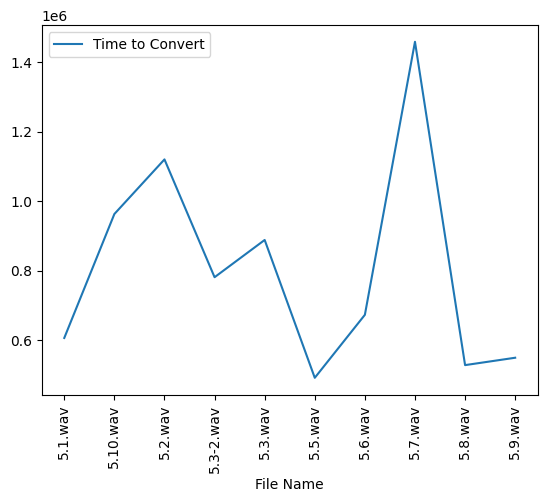

In [10]:
ggl_plot = ggl_df.plot.line(x='File Name', y='Time to Convert')
ggl_plot.set_xticks(np.arange(len(times_by_ggl_sorted)))
ggl_plot.set_xticklabels(ggl_df['File Name'])
ggl_plot.tick_params(axis='x', labelrotation=90)

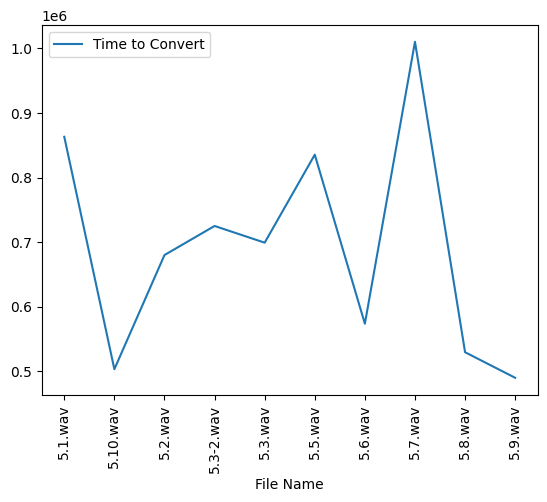

In [11]:
whisper_plot = whisper_df.plot.line(x='File Name', y='Time to Convert')
whisper_plot.set_xticks(np.arange(len(times_by_whisper_sorted)))
whisper_plot.set_xticklabels(whisper_df['File Name'])
whisper_plot.tick_params(axis='x', labelrotation=90)